# Data Scientist Challenge - LATAM Airlines

This is a notebook with the purpose of developing the solution to the Data Scientist challenge given by LATAM Airlines. 

It will be subdivided into the following segments, explaining in detail each one of them in their respective sections:

1.  Problem Statement
2.  Data Distribution - Exploratory Data Analysis
    - 2.1 Data Loading
    - 2.2 Data Distribution
    - 2.3 Conclusions about the distributions
3.  Feature Engineering
    - 3.1 Generating new features
    - 3.2 Exporting the features   
4.  Flight Delay Analysis
    - 4.1 Lateness rate and its relationship with other variables
    - 4.2 Analysis of the best flight delay predictors
5.  Model Training
6.  Model Evaluation
    - 6.1 Model Performance
    - 6.2 Metric Analysis
    - 6.3 Algorithm Analysis
    - 6.4 Feature Importance
    - 6.5 Further Improvements


Also, it is important to notice that instead of defining all the classes and methods in the same notebook, each and every one of them will be kept in their respective local packages. This is what's commonly done when showcasing a jupyter notebook, since the purpose of the notebook itself is to display analysis and results, not the coding per se. 


## 1. Problem Statement

The issue to solve consists of predicting the probability of flight delays which landed or took of from Santiago, Chile (SCL). For the sake of having non-synthetic data, LATAM has provided with real data. Each of the flights contains the following information:

- **Fecha-I** : Scheduled date and time of the flight
- **Vlo-I** : Scheduled flight number
- **Ori-I** : Scheduled origin city code
- **Des-I** : Scheduled destination city code
- **Emp-I** : Scheduled airline code
- **Fecha-O** : Date and time of flight operation
- **Vlo-O** : Flight operation number of the flight
- **Ori-O** : Origin city code of operation
- **Des-O** : Destination city code of operation
- **Emp-O** : Airline code of operated flight
- **DIA** : Day of the month of operation of the flight
- **MES** : Number of the month of operation of the flight
- **AÑO** : Year of operation of the flight
- **DIANOM** : Day of the week of operation of the flight
- **TIPOVUELO** : Type of flight, I =International, N =National
- **OPERA** : Name of the operating airline
- **SIGLAORI** : Name of city of origin
- **SIGLADES** : Name of destination city

We can see that the data that ends with an **-I** corresponds to the scheduled data, and the data that ends with an **-O** corresponds to the data that actually happened.

## 2. Data Distribution - Exploratory Data Analysis

For these kind of projects, there are multiple ways to approach the structure and layout of the solution:

1. We can keep the DB in a Data Warehouse such as RedShift, Athena, BigQuery, or Snowflake (depending on the needs), with the purpose of using ETL processes for loading the data either in a machine-learning platform such as AWS SageMaker.

2. Instead of using a Data Warehouse, we can use an analytics engine for large scale data such as Spark, which is the more common alternative.

3. In this case in particular, the data comes in the form of .csv files. The data will be loaded onto pandas dataframes with the purpose of analyzing the dataframes, so afterwards we can train multiple models and select the one with best validation score. All of this will be done locally in this notebook.

## 2.1 Data loading

Instead of using streamlined methods for data loading and feature engineering, we will be creating the class FlightData from the package "data" for handling both of these. This allows us to extrapolate the pipeline in case of using different datasets.

In [1]:
from data import FlightData

path = "./dataset_SCL.csv"

flight_data = FlightData(path)


/home/vicentecp/Projects/ds-challenge-latam/data/__init__.py:16: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(path)


In [2]:
# Let's take a quick look at the data

flight_data.data.head(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami
6,2017-01-07 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 23:25:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami
7,2017-01-08 23:30:00,226,SCEL,KMIA,AAL,2017-01-08 23:25:00,226,SCEL,KMIA,AAL,8,1,2017,Domingo,I,American Airlines,Santiago,Miami
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,10,1,2017,Martes,I,American Airlines,Santiago,Miami
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,12,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [3]:
import pandas as pd

for column in flight_data.data.columns:
    print(pd.api.types.infer_dtype(flight_data.data[column]))



string
mixed-integer
string
string
string
string
mixed
string
string
string
integer
integer
integer
string
string
string
string
string


In [4]:
flight_data.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


Having looked at 10 out of the 68206 rows of data, we can tell that most the columns are strings, and we will have to make some data manipulation in particular for the dates. Let's take a quick look if there are any Null vals:

In [5]:
import numpy as np

empty_vals = np.where(pd.isnull(flight_data.data))
print("Empty vals: {}".format(empty_vals))
print("Amount of empty vals:{}".format(len(empty_vals[1])))

# Example of NaN data
print(flight_data.data.iloc[empty_vals[0][0]])

Empty vals: (array([6068]), array([6]))
Amount of empty vals:1
Fecha-I       2017-01-19 11:00:00
Vlo-I                         200
Ori-I                        SCEL
Des-I                        SPJC
Emp-I                         LAW
Fecha-O       2017-01-19 11:03:00
Vlo-O                         NaN
Ori-O                        SCEL
Des-O                        SPJC
Emp-O                         56R
DIA                            19
MES                             1
AÑO                          2017
DIANOM                     Jueves
TIPOVUELO                       I
OPERA        Latin American Wings
SIGLAORI                 Santiago
SIGLADES                     Lima
Name: 6068, dtype: object


We can see that there is only 1 null value in the whole dataset, quite impressive to be honest. Usually we would just drop this value since it is just 1 out of roughly 69000, assuming each rows is equally important. But for the sake of creating the "synthetic_features.csv" file, in the following subsection we will see if it is possible to infer the Null value.

## 2.2 Data Distribution

We will be doing both a visual and descriptive analysis of the data distribution. When creating the plots, all of them will be done via the matplotlib package. 

There are some cases where the labels are "duplicated". For example, although "SIGLADES" (corresponding to the name of the destination city) and "DES-O" are different, they have a correlation of one to one. Therefore, Instead of analyzing each of the columns, we will be analyzing the overall distributions of characteristics, such as the dates, the cities, the airlines, and type of flights.  


#### 2.2.1 Dates distribution

Let's start by converting the timestamps using the DateTime module

In [6]:
flight_data.convert_dates()

#Let's take a look at an example

flight_data.data["Fecha-I"][0]

Timestamp('2017-01-01 23:30:00')

In [7]:
print("The dates are between {} and {}".format(min(flight_data.data["Fecha-I"]), max(flight_data.data["Fecha-I"])))

The dates are between 2017-01-01 00:15:00 and 2017-12-31 23:55:00


Looking at the previous range, we can see that all of the flights were during 2017, therefore, there is no need to aggregate by year

In [8]:
# Using a couple of auxiliary values, let's group the dates by different intervals and plot the distributions

df = flight_data.data.copy()


fecha_o_month_count = df["Fecha-O"].groupby(df["Fecha-O"].dt.month).count()
fecha_o_hour_count = df["Fecha-O"].groupby(df["Fecha-O"].dt.hour).count()

fecha_i_month_count = df["Fecha-I"].groupby(df["Fecha-I"].dt.month).count()
fecha_i_hour_count = df["Fecha-I"].groupby(df["Fecha-I"].dt.hour).count()



/home/vicentecp/miniconda3/envs/ds-challenge-latam/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


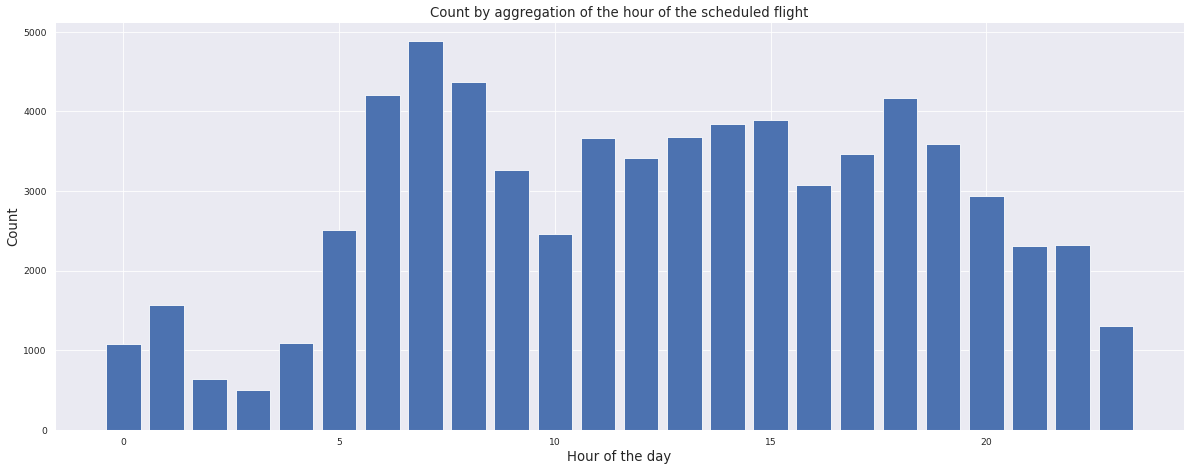

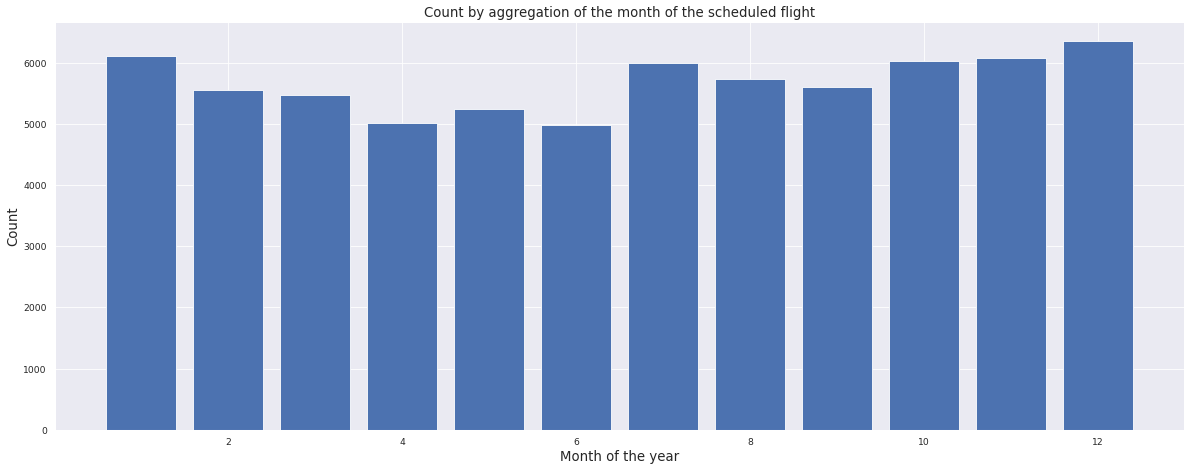

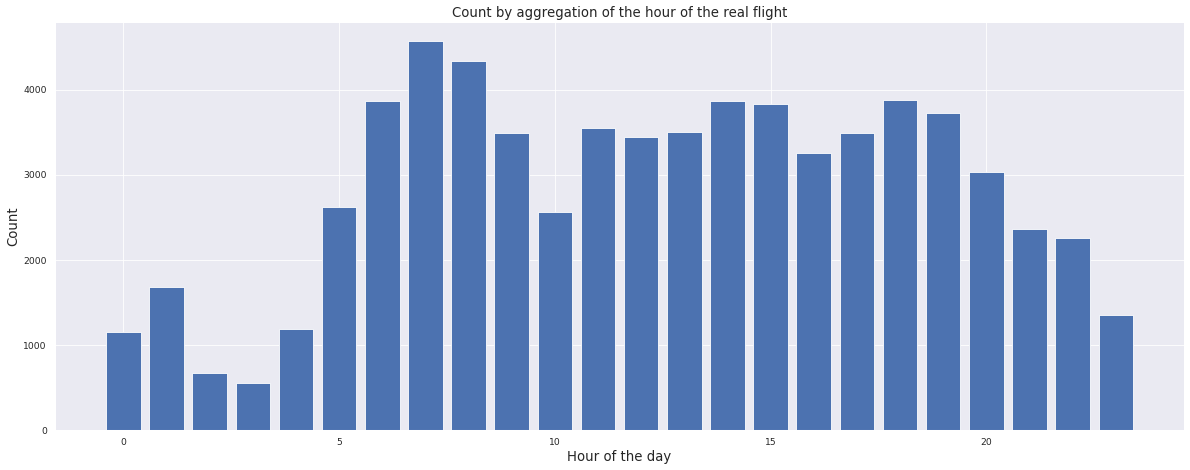

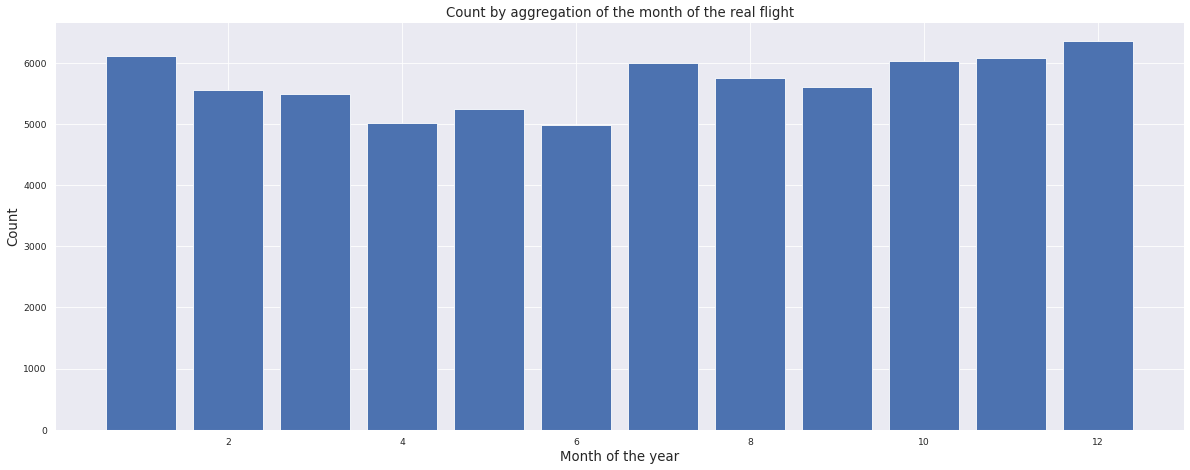

In [9]:
from visualizer.distribution import dates_distribution
 
import seaborn as sns
sns.set_theme()
   
dates_distribution(fecha_i_hour_count,"Hour of the day","Count","Count by aggregation of the hour of the scheduled flight")
dates_distribution(fecha_i_month_count,"Month of the year","Count","Count by aggregation of the month of the scheduled flight")
dates_distribution(fecha_o_hour_count,"Hour of the day","Count","Count by aggregation of the hour of the real flight")
dates_distribution(fecha_o_month_count,"Month of the year","Count","Count by aggregation of the month of the real flight")


A more important distribution, I believe it to be the day of the week, let's take a look at it

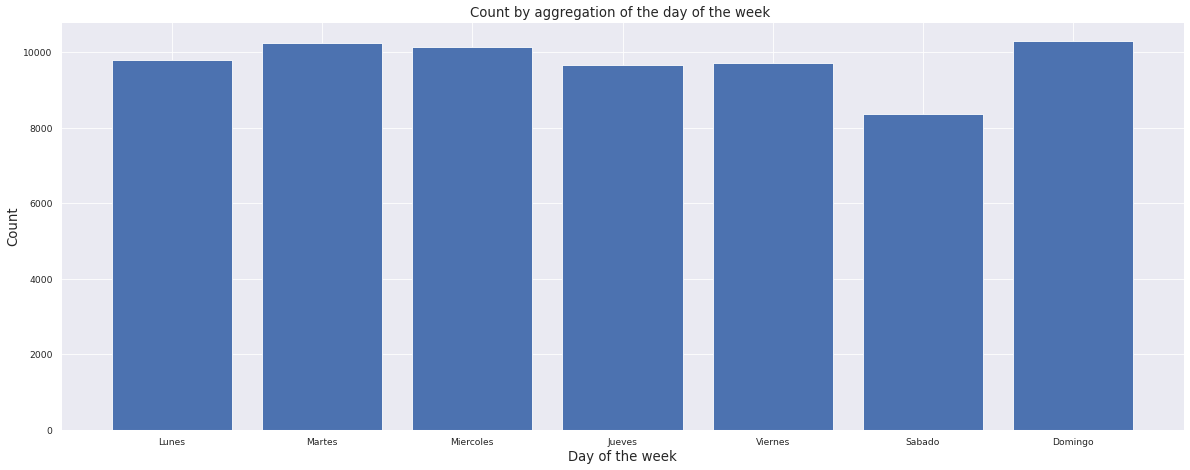

In [10]:
from visualizer.distribution import general_distribution

agg_day_week_count = flight_data.data.groupby(["DIANOM"])["DIANOM"].count().to_frame()
new_index = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]
agg_day_week_count.reindex(new_index)
general_distribution(new_index, agg_day_week_count["DIANOM"],"Day of the week","Count","Count by aggregation of the day of the week ")


#### 2.2.2 Cities distribution and Airline Distribution

Let's see the amount of unique values in both the origin and destination cities. For this analysis we'll assume the programmed and the operational cities are the same, since the cases where they are not should be quite low, which happens only in emergency landings.

In [11]:
agg_ori_count = flight_data.data.groupby(["SIGLAORI"])["SIGLAORI"].count()
agg_arri_count = flight_data.data.groupby(["SIGLADES"])["SIGLADES"].count()

print("Count of unique cities associated to the origin:\n{}\n".format(agg_ori_count))
print("Count of unique cities associated to the arrival:\n{}".format(agg_arri_count))


Count of unique cities associated to the origin:
SIGLAORI
Santiago    68206
Name: SIGLAORI, dtype: int64

Count of unique cities associated to the arrival:
SIGLADES
Antofagasta      5786
Arica            2436
Asuncion          232
Atlanta           358
Auckland N.Z.     361
                 ... 
Toronto           283
Tucuman            38
Ushuia              6
Valdivia          753
Washington          1
Name: SIGLADES, Length: 62, dtype: int64


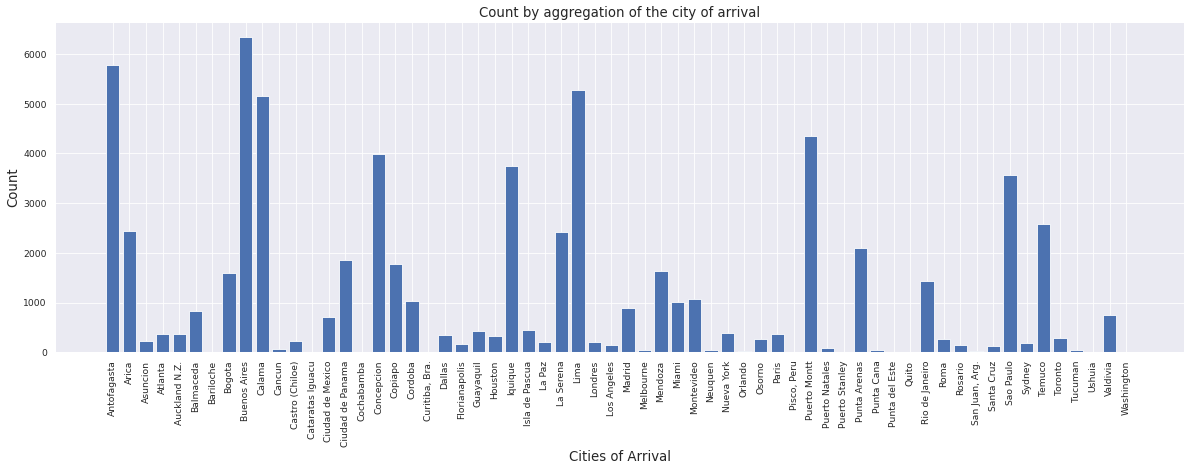

In [12]:
general_distribution(agg_arri_count.index, agg_arri_count,"Cities of Arrival","Count","Count by aggregation of the city of arrival", tick_rotation=True, scale="log")


Now, let's see the cases of National vs International

In [13]:
nat_int = flight_data.data.groupby(["TIPOVUELO"])["TIPOVUELO"].count()
print("Count of national vs international cities associated to the arrival:\n{}".format(nat_int))


Count of national vs international cities associated to the arrival:
TIPOVUELO
I    31240
N    36966
Name: TIPOVUELO, dtype: int64


In [14]:
# Let's take a look at the airlines distribution

airline_count = flight_data.data.groupby(["OPERA"])["OPERA"].count()
print("Count of Airline which operate the flight:\n{}".format(airline_count))


Count of Airline which operate the flight:
OPERA
Aerolineas Argentinas        1949
Aeromexico                    351
Air Canada                    565
Air France                    358
Alitalia                      259
American Airlines             757
Austral                        74
Avianca                      1152
British Airways               205
Copa Air                     1850
Delta Air                     358
Gol Trans                     806
Grupo LATAM                 40892
Iberia                        362
JetSmart SPA                 1095
K.L.M.                        251
Lacsa                          92
Latin American Wings         1674
Oceanair Linhas Aereas        279
Plus Ultra Lineas Aereas       49
Qantas Airways                195
Sky Airline                 14298
United Airlines               335
Name: OPERA, dtype: int64


## 2.3 Conclusions about the distributions

About the cities: